In [37]:
# import pandas as pd
# from sklearn.naive_bayes import GaussianNB
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# # Load data
# df = pd.read_csv("./data/loan_sanction_train.csv")

# # Preprocess data
# df = df.drop('Loan_ID', axis=1)  # Drop Loan_ID column
# df = df.replace('3+', '3')  # Replace '3+' with '3' in Dependents column
# df = df.dropna()  # Drop rows with missing values

# # Convert categorical columns to numerical using one-hot encoding
# cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
# df_cat = df[cat_cols]
# le = LabelEncoder()
# df_cat = df_cat.apply(le.fit_transform)  # Convert to numerical using LabelEncoder
# ohe = OneHotEncoder()
# df_cat = ohe.fit_transform(df_cat).toarray()  # Convert to numerical using OneHotEncoder

# # Combine numerical and categorical columns
# num_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
# df_num = df[num_cols].values
# X = pd.concat([pd.DataFrame(df_cat), pd.DataFrame(df_num)], axis=1).values
# y = df['Loan_Status'].values

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train model
# clf = GaussianNB()
# clf.fit(X_train, y_train)

# # Make predictions on test data
# y_pred = clf.predict(X_test)

# # Calculate accuracy score, precision and recall
# acc_score = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, pos_label='Y')
# recall = recall_score(y_test, y_pred, pos_label='Y')

# # Print results
# print("Accuracy score:", acc_score)
# print("Precision:", precision)
# print("Recall:", recall)

Accuracy score: 0.8229166666666666
Precision: 0.8072289156626506
Recall: 0.9852941176470589


In [38]:
df.head(100)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
128,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N
131,Male,No,0,Graduate,No,2014,1929.0,74.0,360.0,1.0,Urban,Y
132,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban,Y
133,Male,Yes,0,Graduate,Yes,3459,0.0,25.0,120.0,1.0,Semiurban,Y


Accuracy score: 0.8229166666666666
Precision: 0.8072289156626506
Recall: 0.9852941176470589


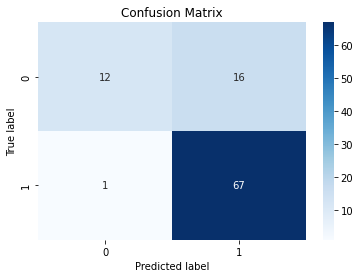

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load data
df = pd.read_csv("./data/loan_sanction_train.csv")

# Preprocess data
df = df.drop('Loan_ID', axis=1)  # Drop Loan_ID column
df = df.replace('3+', '3')  # Replace '3+' with '3' in Dependents column
df = df.dropna()  # Drop rows with missing values

# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
df_cat = df[cat_cols]
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)  # Convert to numerical using LabelEncoder
ohe = OneHotEncoder()
df_cat = ohe.fit_transform(df_cat).toarray()  # Convert to numerical using OneHotEncoder

# Combine numerical and categorical columns
num_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df_num = df[num_cols].values
X = pd.concat([pd.DataFrame(df_cat), pd.DataFrame(df_num)], axis=1).values
y = df['Loan_Status'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Calculate accuracy score, precision and recall
acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Y')
recall = recall_score(y_test, y_pred, pos_label='Y')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy score:", acc_score)
print("Precision:", precision)
print("Recall:", recall)

# Display confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


Accuracy score: 0.8229166666666666
Precision: 0.8
Recall: 1.0


<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

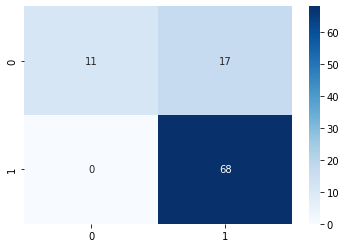

In [5]:
#feature engineering: LoanAmountRatio and TotalIncome

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load data
df = pd.read_csv("./data/loan_sanction_train.csv")

# Preprocess data
df = df.drop('Loan_ID', axis=1)  # Drop Loan_ID column
df = df.replace('3+', '3')  # Replace '3+' with '3' in Dependents column
df = df.dropna()  # Drop rows with missing values

# Combine ApplicantIncome and CoapplicantIncome into TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

# Create new feature LoanAmountRatio
df['LoanAmountRatio'] = df['LoanAmount'] / df['TotalIncome']

# Convert categorical columns to numerical using one-hot encoding
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
df_cat = df[cat_cols]
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)  # Convert to numerical using LabelEncoder
ohe = OneHotEncoder()
df_cat = ohe.fit_transform(df_cat).toarray()  # Convert to numerical using OneHotEncoder

# Combine numerical and categorical columns
num_cols = ['Dependents', 'Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'LoanAmountRatio']
df_num = df[num_cols].values
X = pd.concat([pd.DataFrame(df_cat), pd.DataFrame(df_num)], axis=1).values
y = df['Loan_Status'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Calculate accuracy score, precision and recall
acc_score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Y')
recall = recall_score(y_test, y_pred, pos_label='Y')
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy score:", acc_score)
print("Precision:", precision)
print("Recall:", recall)

# Display confusion matrix as heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel
